# Plot rank maps of along-track data
* stephanie.leroux@ocen-next.fr

# Imports

In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import cartopy.feature as ccf
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

from jdcal import gcal2jd, jd2gcal

%matplotlib inline 

# Define some functions for plot purposes

In [2]:
def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap


In [2]:
def plotmapSCATT(fig1,ehonan,nav_lon,nav_lat,cm_base,vmin,vmax,Nincr,plto,glo=True,coastL=False,coastC=False,xlim=(0,10),ylim=(0,10),su='b',so='k',loncentr=0.):
        '''
        
        Plot regional or global map of scatter data (point by point data).
        Uses Cartopy.
        Parameters: (...to be done...)

        '''
        
        ## imports
        import os,sys
        import numpy as np

        # xarray
        import xarray as xr

        # plot
        import cartopy.crs as ccrs
        import cartopy.feature as ccf
        import matplotlib.pyplot as plt
        from matplotlib.colors import Colormap
        import matplotlib.colors as mcolors
        import matplotlib.dates as mdates
        import matplotlib.cm as cm
        import matplotlib.dates as mdates
        import matplotlib.ticker as mticker
        
        # Colormap & levels
        cmap = plt.get_cmap(cm_base)
        cmap.set_under(su,1.)
        cmap.set_over(so,1.) 
        levels = mticker.MaxNLocator(nbins=Nincr).tick_values(vmin, vmax)
        norm   = mcolors.BoundaryNorm(levels, ncolors=cmap.N)
        
        # Projection
        
        trdata  = ccrs.PlateCarree() 
        # Note: if data points are given in classical lat lon coordinates this should
        #       be set to ccrs.PlateCarree() whatever the map projection is.
        
        if glo:
            ax = plt.axes(projection=ccrs.Robinson(central_longitude=loncentr))
            # marker size
            sm=0.1
        else:
            ax = plt.axes(projection= ccrs.PlateCarree())
            # marker size
            sm=0.5
        
        if glo:
            ax.set_global()  
        
        ax.outline_patch.set_edgecolor('white')

        # grid on map
        if glo:
            gl = ax.gridlines(linewidth=1, color='#585858', alpha=0.2, linestyle='--') 
        else:
            gl = ax.gridlines(draw_labels=True,linewidth=1, color='#585858', alpha=0.2, linestyle='--')
            # grid labels
            label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}
            gl.xlabel_style = label_style
            gl.xlabels_bottom = False
            gl.xlocator = mticker.FixedLocator(np.arange(-180,180,20,dtype=float))
            gl.ylabel_style = label_style
            gl.ylabels_right = False
            gl.ylocator = mticker.FixedLocator(np.arange(-90,90,20,dtype=float))
       
        # Add Coastlines and or plain continents
        if coastC:
            ax.add_feature(ccf.LAND, facecolor='#585858', edgecolor='none')
        if coastL:
            ax.coastlines(color='#585858')
        
        ### PLOTS:
        # plot points where rank is 0
        cs2 = plt.scatter(nav_lon.where(ehonan==0.), nav_lat.where(ehonan==0.), s=sm, marker="D",color=su,transform=trdata,norm=norm,vmin=vmin,vmax=vmax)
        # plot points where rank is 1
        cs3 = plt.scatter(nav_lon.where(ehonan==1.), nav_lat.where(ehonan==1.), s=sm,  marker="D",color=so,transform=trdata,norm=norm,vmin=vmin,vmax=vmax)
        # plot points where rank is different from 0 and 1 (true obs in the model pdf)
        cs = plt.scatter(nav_lon.where((ehonan!=1.)&(ehonan!=0.)), nav_lat.where((ehonan!=1.)&(ehonan!=0.)), s=sm, marker="D", c=ehonan.where((ehonan!=1.)&(ehonan!=0.)), cmap=cmap,transform=trdata,norm=norm,vmin=vmin,vmax=vmax)
        
        if glo==False:
            #limits
            plt.xlim(xlim)
            plt.ylim(ylim) 

        # plot colorbar
        cb = plt.colorbar(cs, extend='both',  pad=0.04, orientation='horizontal', shrink=0.75)
        cb.ax.tick_params(labelsize=15) 
        cb.set_label(labelplt,size=15)
        ticks = np.linspace(vmin,vmax,11)
        cb.set_ticks(ticks)
        new_tickslabels = ["%.2f" % i for i in ticks]
        cb.set_ticklabels(new_tickslabels)
        
        return  cs

# Some parameters

In [3]:
# data dirtectory
diri = "./"

# directory where to save plots
diro=diri

# name of variable in .cobs files (from Sesam)
varna='JASON'

# TIME coordinate:
# cnes reference julian date 
cnesjdref = 2433282.5 
# will use package jdcal to convert julian days to dates

# Make custom colormap

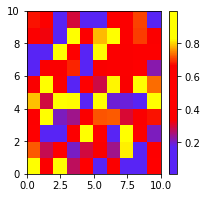

In [77]:
### colors to include in my custom colormap
colors=[(255,255,0),(255,255,0),(250,0,0),(255,0,0),(250,0,0),(88,36,245),(88,36,245)]

### Call the function make_cmap which returns my colormap
my_cmap = make_cmap(colors[::-1], bit=True)

### Display my colormap
plotcolormap=True
if plotcolormap:
    fig = plt.figure(figsize=([3,3]),facecolor='white')
    #ax = fig.add_subplot(311)
    plt.pcolor(np.random.rand(10,10), cmap=my_cmap)
    plt.colorbar()
    plt.show() 
    plt.close(fig) 


# Regional plots
* Scatterplot of rank at all along-track obs points on the map 
* loop on time segments

2010-1-5


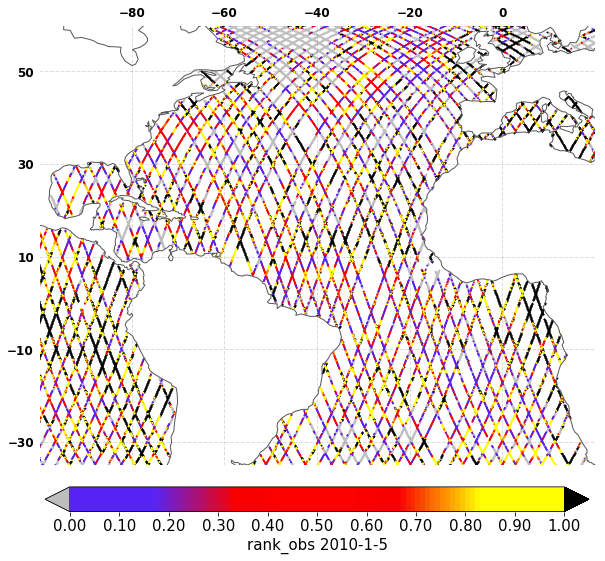

2010-1-15


In [139]:
ic=0
for seg in range(21915,21935,10):
        ic=ic+1
        lon = xr.open_dataset(diri+'rank_JASON_RANK50_'+str(seg)+'_0011.cobs')['lon'] 
        lat = xr.open_dataset(diri+'rank_JASON_RANK50_'+str(seg)+'_0011.cobs')['lat'] 
        rank =xr.open_dataset(diri+'rank_JASON_RANK50_'+str(seg)+'_0011.cobs')[varna] 
        DATE = jd2gcal(seg+4,cnesjdref)
        #print(DATE)
        # note: +4 is to ghet the date in the middle of the 10d period (1 cycle) so that it is the same convention as for the 5-d output gridded files. 
        datena= str(DATE[0])+'-'+str(DATE[1])+'-'+str(DATE[2])
        print(datena)


        #------ PARAMETERS ---------------
        # colormap
        cm_base=my_cmap  

        # min/max values
        vmin=0.
        vmax=1.
        Nincr=100

        # data to plot: rank
        data2plot = rank.squeeze()

        # plot title and output file title
        plti="rank_obs"
        plto = "NATL_SLA."+plti+'_'+datena
        labelplt= plti+' '+datena
        # unit to appear in plot title
        unitna = 'm'

        # output res and format
        dpifig=300
        pltty = ".png"


        #------ START PLOTTING ------------
        # create fig
        fig1 = plt.figure(figsize=([13,10]),facecolor='white')

        # plot data 
        cs =  plotmapSCATT(fig1,data2plot,lon,lat,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,xlim=(-100,20),ylim=(-35,60) ,plto=plto,glo=False,coastL=True,coastC=False,su='#BDBDBD',so='k') #, 
        
        if ic==1:
            plt.show()

        # Save fig in png, resolution dpi
        fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#
        plt.close(fig1)       

# Global plots
* Scatterplot of rank at all along-track obs points on the map 
* Central latitude = 180
* loop on time segments

2010-1-5


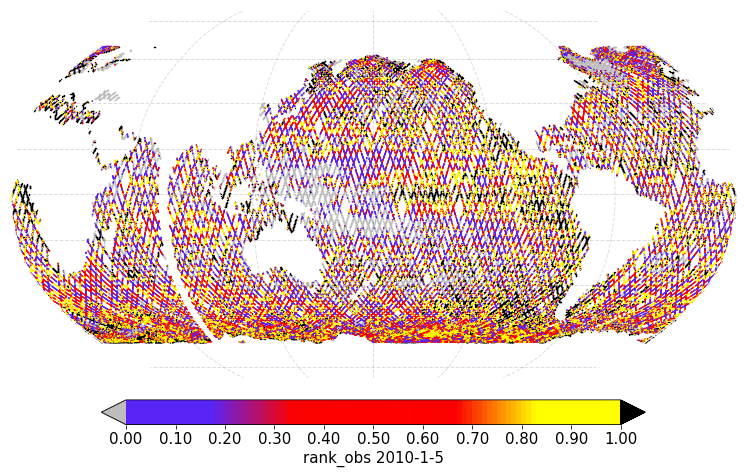

2010-1-15


In [143]:
ic=0
for seg in range(21915,21935,10):
        ic=ic+1
        lon = xr.open_dataset(diri+'rank_JASON_RANK50_'+str(seg)+'_0011.cobs')['lon'] 
        lat = xr.open_dataset(diri+'rank_JASON_RANK50_'+str(seg)+'_0011.cobs')['lat'] 
        rank =xr.open_dataset(diri+'rank_JASON_RANK50_'+str(seg)+'_0011.cobs')[varna] 
        DATE = jd2gcal(seg+4,cnesjdref)
        #print(DATE)
        # note: +4 is to ghet the date in the middle of the 10d period (1 cycle) so that it is the same convention as for the 5-d output gridded files. 
        datena= str(DATE[0])+'-'+str(DATE[1])+'-'+str(DATE[2])
        print(datena)
        
        # colormap
        cm_base=my_cmap  #'Spectral_r'#cm_base=my_cmap #
        # min/max values
        vmin=0.
        vmax=1.
        Nincr=100
        loncentr=180
        cmap = plt.get_cmap(cm_base)
        cmap
        data2plot = rank.squeeze()

        plti="rank_obs"
        plto = "GLOB180"+"_SLA."+plti+'_'+datena
        labelplt= plti+' '+datena

        #------ START PLOTTING-----------------------------------------------------------------------
        # create fig
        fig1 = plt.figure(figsize=([13,10]),facecolor='white')

        # plot data (base plot)
        css =  plotmapSCATT(fig1,data2plot,lon,lat,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,plto=plto,glo=True,loncentr=loncentr,coastL=False,su='#BDBDBD',so='k')   
        if ic==1:
            plt.show()

        # Save fig in png, resolution dpi
        fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#
        plt.close(fig1)       

# Global plots
* Scatterplot of rank at all along-track obs points on the map 
* Central latitude = 0
* loop on time segments

2010-1-5


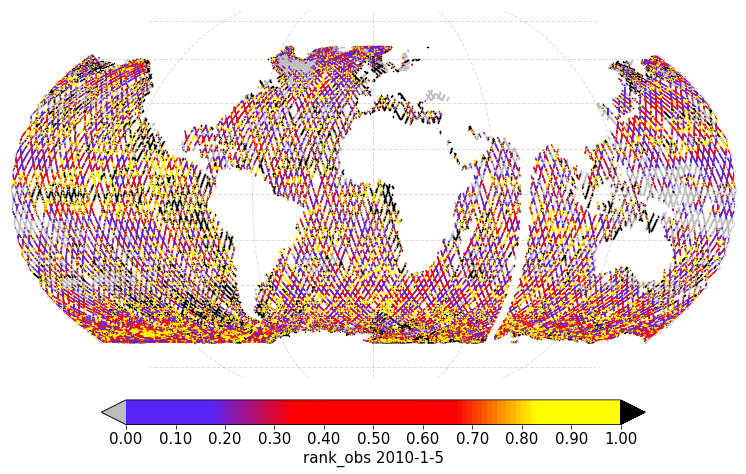

2010-1-15


In [142]:
ic=0
for seg in range(21915,21935,10):
        ic=ic+1
        lon = xr.open_dataset(diri+'rank_JASON_RANK50_'+str(seg)+'_0011.cobs')['lon'] 
        lat = xr.open_dataset(diri+'rank_JASON_RANK50_'+str(seg)+'_0011.cobs')['lat'] 
        rank =xr.open_dataset(diri+'rank_JASON_RANK50_'+str(seg)+'_0011.cobs')[varna] 
        DATE = jd2gcal(seg+4,cnesjdref)
        #print(DATE)
        # note: +4 is to ghet the date in the middle of the 10d period (1 cycle) so that it is the same convention as for the 5-d output gridded files. 
        datena= str(DATE[0])+'-'+str(DATE[1])+'-'+str(DATE[2])
        print(datena)
        
        # colormap
        cm_base=my_cmap  #'Spectral_r'#cm_base=my_cmap #
        # min/max values
        vmin=0.
        vmax=1.
        Nincr=100
        loncentr=0
        cmap = plt.get_cmap(cm_base)
        cmap
        data2plot = rank.squeeze()

        plti="rank_obs"
        plto = "GLOB0"+"_SLA."+plti+'_'+datena
        labelplt= plti+' '+datena

        #------ START PLOTTING-----------------------------------------------------------------------
        # create fig
        fig1 = plt.figure(figsize=([13,10]),facecolor='white')

        # plot data (base plot)
        cs =  plotmapSCATT(fig1,data2plot,lon,lat,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,plto=plto,glo=True,xlim=(-180,180),ylim=(-60,60),su='#BDBDBD',so='k',loncentr=loncentr)   
        if ic==1:
            plt.show()

        # Save fig in png, resolution dpi
        fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#
        plt.close(fig1)       